## Paula Perez y Valeria Quintanilla 

### Instalacion de la libreria
 


In [62]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\acer\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (2.0.3)



In [63]:
pip install -U scikit-learn


In [64]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\acer\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.12.2)



In [66]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()

In [67]:
import pandas as pd 

In [68]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

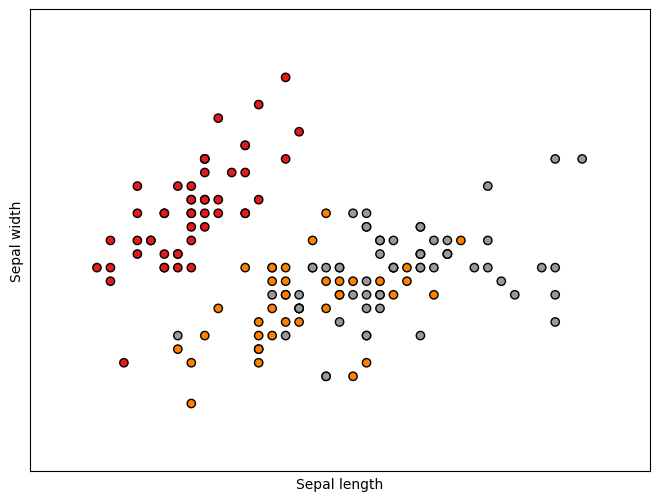

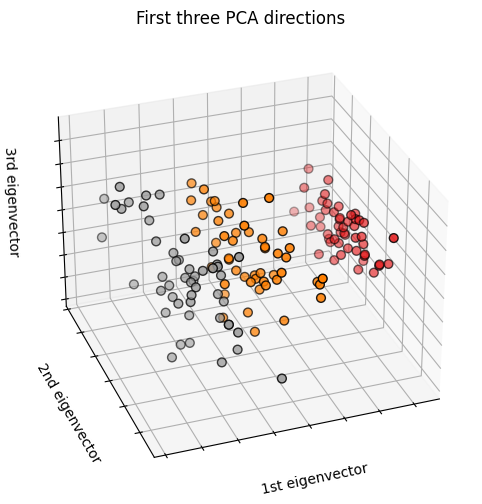

In [69]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [70]:
import seaborn as sns
iris= sns.load_dataset("iris")

In [71]:
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Entendemos que la base de datos tiene 5 variables de las cuales 4 son variables tipo float que me permiten entender:

 -Sepal length: Explica el largo del sépalo de las flores, en centimetros.
 -Sepal width: Explica el ancho del sépalo de las flores, en centimetros. 
 -Petal length: Explica la longitud del petalo en centimetros.
 -Petal width: Explica el ancho del petalo en centimetros.

La 5 variable es una variable categorica y permite entender:

 -Species: Explica la especie a la que puede pertenecer cada flor. Estas especies pueden ser:  Iris setosa, Iris versicolor o Iris virginica.
Se define que SEPAL WIDTH es nuestra variable de interes.

### Regresion logística multinomial

Para poder realizar la regresion logística multinomial, nos basamos en el siguiente codigo "

In [72]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#for chapter 3.2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt


#for chapter 4
import statsmodels.api as sm

En primer lugar, se asignaran los predictores y el criterio a cada objeto y se divide el dataset en una parte de entrenamiento y una parte de prueba.



In [73]:
x = iris.drop('species', axis=1)
y = iris['species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [74]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [75]:
classifier = LogisticRegression()
classifier.fit(trainX, trainY)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
y_pred = classifier.predict(testX)
y_pred

array(['virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa'], dtype=object)

In [77]:
result = pd.DataFrame({'Actual' : testY, 'Predicted' : y_pred})
result

,Actual,Predicted
113,virginica,virginica
86,versicolor,versicolor
5,setosa,setosa
47,setosa,setosa
109,virginica,virginica
52,versicolor,versicolor
70,versicolor,virginica
107,virginica,virginica
51,versicolor,versicolor
127,virginica,virginica


In [78]:
classifier.coef_

array([[-0.46136152,  0.83302958, -2.35968824, -1.02359655],
       [ 0.4956402 , -0.34971063, -0.15455483, -0.85941931],
       [-0.03427868, -0.48331895,  2.51424308,  1.88301586]])

In [79]:
classifier.intercept_ 

array([  9.70078634,   2.08728872, -11.78807506])

In [80]:
print(classifier.predict_proba(x))

[[9.77075428e-01 2.29245061e-02 6.58211992e-08]
 [9.66182823e-01 3.38170615e-02 1.15409755e-07]
 [9.82028736e-01 1.79712134e-02 5.08396708e-08]
 [9.71729089e-01 2.82707651e-02 1.45743217e-07]
 [9.81409308e-01 1.85906364e-02 5.55356181e-08]
 [9.62455774e-01 3.75438896e-02 3.35947046e-07]
 [9.83635829e-01 1.63640891e-02 8.16456484e-08]
 [9.70950273e-01 2.90496102e-02 1.16393078e-07]
 [9.76168104e-01 2.38317888e-02 1.07432640e-07]
 [9.63263730e-01 3.67361474e-02 1.22800376e-07]
 [9.70150654e-01 2.98492528e-02 9.29514916e-08]
 [9.70117709e-01 2.98821174e-02 1.73832430e-07]
 [9.69660714e-01 3.03392033e-02 8.29893687e-08]
 [9.90092877e-01 9.90710680e-03 1.58606979e-08]
 [9.83933973e-01 1.60660095e-02 1.74603809e-08]
 [9.81823278e-01 1.81766460e-02 7.60994536e-08]
 [9.84109688e-01 1.58902628e-02 4.88928058e-08]
 [9.76704772e-01 2.32951404e-02 8.79900534e-08]
 [9.45577325e-01 5.44223546e-02 3.20012340e-07]
 [9.79572688e-01 2.04272147e-02 9.67997460e-08]
 [9.36161843e-01 6.38378036e-02 3.528720

In [81]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(testY, y_pred)
cf_matrix

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

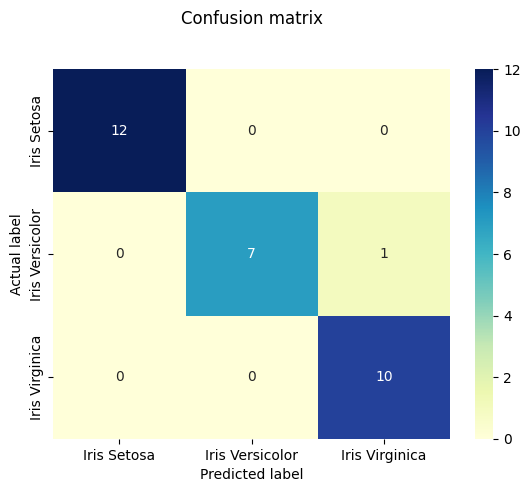

In [82]:
class_labels = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]

# Visualización de la matriz de confusión con etiquetas de clase
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.97
Error rate: 0.03


In [84]:
accuracy_score(testY,y_pred)

0.9666666666666667

In [85]:
from sklearn.metrics import classification_report
target_names = ['virginica','setosa','versicolor']
print(classification_report(testY, y_pred,target_names=target_names))

              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00        12
      setosa       1.00      0.88      0.93         8
  versicolor       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



" Tomado de (Multinomial Logistic Regression - Michael Fuchs Python, 2019)

Lo que podemos concluir de 

### KNN

In [123]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [121]:
iris= sns.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [122]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
iris["sepal_width_2"] = pd.qcut(iris["sepal_width"], 4, retbins=False, labels=[1, 2, 3, 4])
iris["sepal_width_2"]

0      4
1      2
2      3
3      3
4      4
      ..
145    2
146    1
147    2
148    4
149    2
Name: sepal_width_2, Length: 150, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [90]:
# A continuación, podemos dividir nuestro conjunto de datos en sus atributos y etiquetas:
y = iris['sepal_width_2']
X = iris.drop(['sepal_width_2', 'sepal_width', 'species'], axis = 1)

In [91]:
y.head()

0    4
1    2
2    3
3    3
4    4
Name: sepal_width_2, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [92]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 2. Dividir los datos en conjuntos de entrenamiento y de prueba

In [93]:
from sklearn.model_selection import train_test_split

#Semilla aleatoria debido que es un modelo de aprendizaje porlo tanto cada que ejecute el mismo codigo, obtendra la misma división de datos cada vez. 
SEED = 42

# Esta línea realiza la división real del conjunto de datos en conjuntos de entrenamiento y prueba. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [94]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
X_train

array([[-1.01827123, -1.39338902, -1.3621769 ],
       [-0.7730102 , -1.33550342, -1.49647603],
       [-0.03722712,  0.74837808,  0.92090833],
       [ 0.20803391,  0.4010645 ,  0.51801093],
       [ 1.06644751,  0.51683569,  0.3837118 ],
       [-0.52774918, -1.45127462, -1.09357864],
       [-0.52774918, -1.33550342, -1.3621769 ],
       [-0.40511866, -0.06202028, -0.28778385],
       [ 0.57592545,  0.74837808,  0.3837118 ],
       [ 0.69855596,  0.97992047,  0.7866092 ],
       [ 0.94381699,  0.3431789 ,  0.24941267],
       [ 1.67960008,  1.32723405,  1.72670311],
       [-0.15985763,  0.2274077 ,  0.11511354],
       [ 2.17012213,  1.61666204,  1.18950659],
       [-0.28248815,  0.4010645 ,  0.3837118 ],
       [-0.89564072, -1.39338902, -1.3621769 ],
       [ 2.29275265,  1.67454764,  1.05520746],
       [-0.03722712,  0.16952211, -0.28778385],
       [-0.7730102 , -1.39338902, -1.3621769 ],
       [-1.01827123, -1.45127462, -1.22787777],
       [-0.89564072, -1.10396103, -1.093

#### 3. Entrenamiento y predicción para la clasificación

In [96]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

#### 4. Evaluando KNN para la clasificación

In [98]:
acc =  classifier.score(X_test, y_test)
print(acc) 

0.42105263157894735


##### Métricas

              precision    recall  f1-score   support

           1       0.40      0.36      0.38        11
           2       0.12      0.14      0.13         7
           3       0.31      0.40      0.35        10
           4       1.00      0.70      0.82        10

    accuracy                           0.42        38
   macro avg       0.46      0.40      0.42        38
weighted avg       0.48      0.42      0.44        38



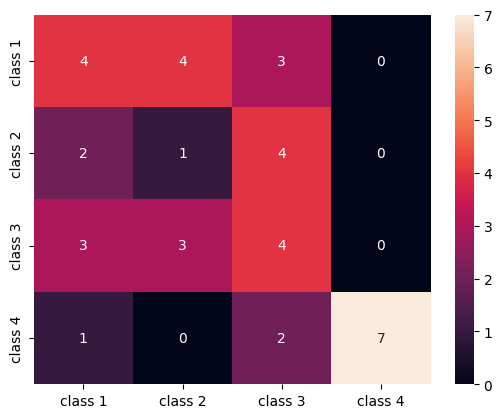

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2', 'class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

None 0.8133333333333334
0.2 0.82


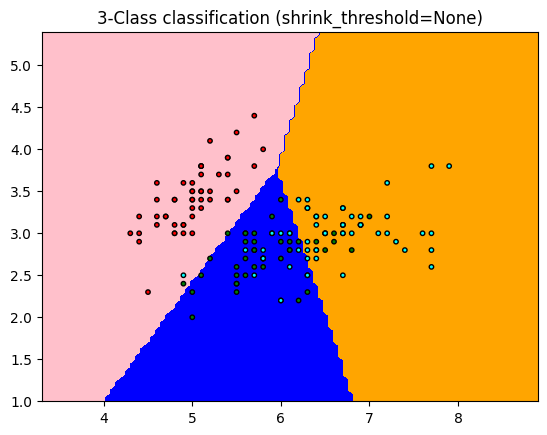

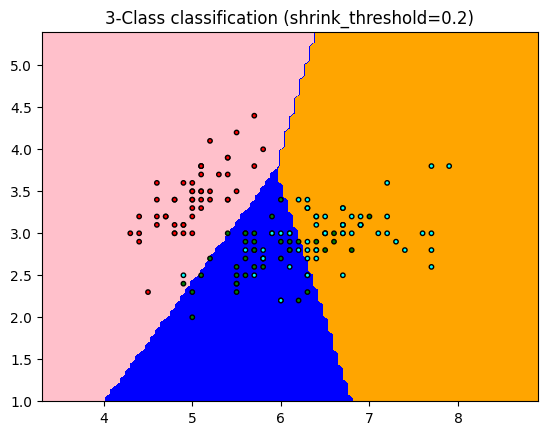

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Seleccionar dos características diferentes, por ejemplo, 'sepal length (cm)' y 'sepal width (cm)'
X_2d = X[:, [0, 1]]  # Seleccionar las dos primeras características
y = iris.target  # Usar las etiquetas originales de Iris

# Create color maps
cmap_light = ListedColormap(["pink", "blue", "orange"])
cmap_bold = ListedColormap(["red", "green", "cyan"])

for shrinkage in [None, 0.2]:
    # Crear una instancia del clasificador de Nearest Centroid y ajustar los datos.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

#### 4. Encontrar la mejor clasificación KNN

In [104]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

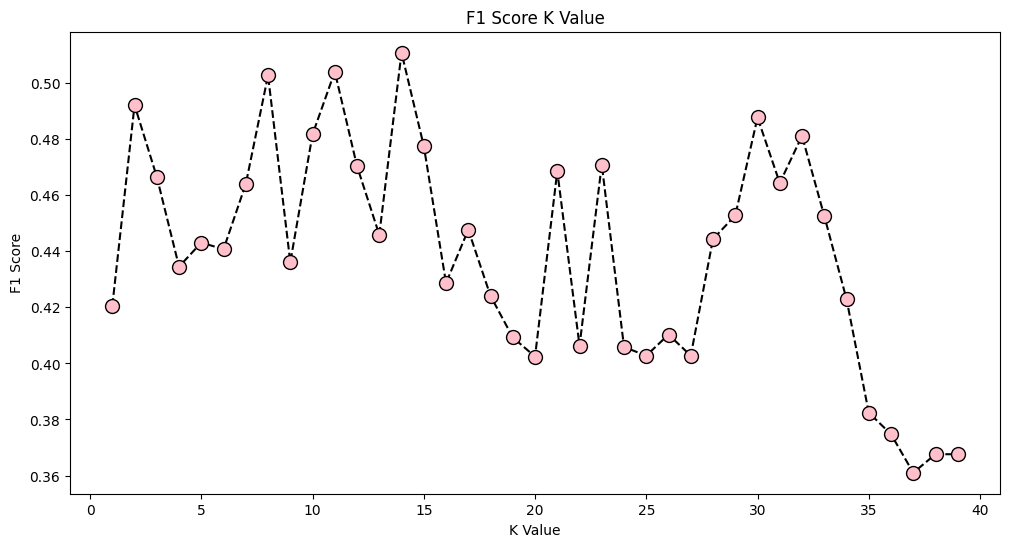

In [105]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='black', linestyle='dashed', marker='o', markerfacecolor='pink', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [106]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.62      0.45      0.53        11
           2       0.11      0.14      0.12         7
           3       0.44      0.40      0.42        10
           4       0.67      0.80      0.73        10

    accuracy                           0.47        38
   macro avg       0.46      0.45      0.45        38
weighted avg       0.49      0.47      0.48        38



#### Implementando KNN para detección de datos atipicos con Scikit-Learn

In [107]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 3)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [108]:
distances[:3], distances.shape

(array([[0.        , 0.        , 0.0578856 ],
        [0.        , 0.14624294, 0.18186396],
        [0.        , 0.        , 0.18186396]]),
 (112, 3))

In [109]:
indexes[:3], indexes[:3].shape

(array([[ 43,   0,  49],
        [  1,  18,  86],
        [  2,  35, 105]], dtype=int64),
 (3, 3))

Text(0, 0.5, 'Mean Distances')

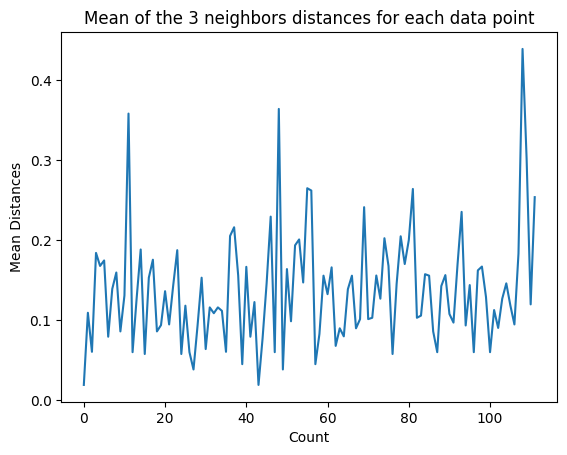

In [110]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

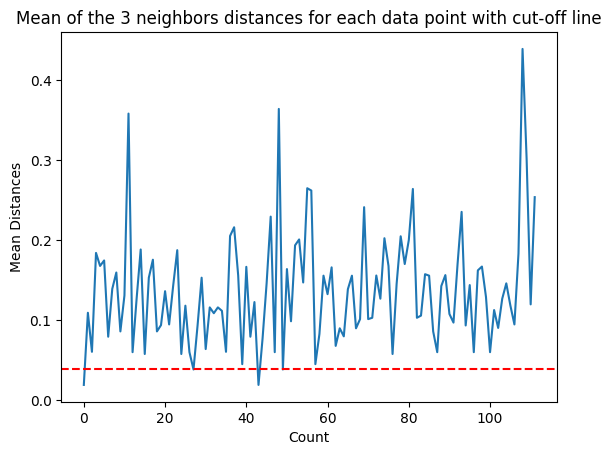

In [111]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.039, color = 'r', linestyle = '--')

In [112]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 0.039)
outlier_index

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  44,  45,  46,  47,  48,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111], dtype=int64),)

In [114]:
import seaborn as sns
import pandas as pd

# Cargar el conjunto de datos Iris como un DataFrame de pandas
iris = sns.load_dataset("iris")

# Ahora puedes utilizar iloc
outlier_values = iris.iloc[outlier_index]


In [115]:
# Filter outlier values
outlier_values = iris.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
110,6.5,3.2,5.1,2.0,virginica


### Multinomial VS KNN

### Bibliografia

Multinomial Logistic Regression - Michael Fuchs Python. (2019, 15 noviembre). https://michael-fuchs-python.netlify.app/2019/11/15/multinomial-logistic-regression/